# **GC4 Phase 1**

Name: Julio Putra David

Batch: 10

______________

## **1. Introduction**

This notebook will cover the establishment of unsupervised machine learning model for a customer segmentation to define marketing strategy. The Dataset contains the usage behavior of about 9000 active credit card holders during the last 6 months.

#### **Attribute Information**

* `CUSTID` : Identification of Credit Card holder (Categorical)
* `BALANCE` : Balance amount left in their account to make purchases
* `BALANCEFREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* `PURCHASES` : Amount of purchases made from account
* `ONEOFFPURCHASES` : Maximum purchase amount done in one-go
* `INSTALLMENTSPURCHASES` : Amount of purchase done in installment
* `CASHADVANCE` : Cash in advance given by the user
* `PURCHASESFREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* `ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* `PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* `CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid
* `CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"
* `PURCHASESTRX` : Numbe of purchase transactions made
* `CREDITLIMIT` : Limit of Credit Card for user
* `PAYMENTS` : Amount of Payment done by user
* `MINIMUM_PAYMENTS` : Minimum amount of payments made by user
* `PRCFULLPAYMENT` : Percent of full payment paid by user
* `TENURE` : Tenure of credit card service for user

## **2. Import Libraries**

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Pre-processing Libraries
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc

# Clustering Libraries
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Warning Neglect Library
import warnings
warnings.filterwarnings('ignore')

## **3. Data Loading**

In [2]:
df = pd.read_csv('CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
r = df.shape[0]
c = df.shape[1]
print('Number of rows    =', r)
print('Number of columns =', c)

Number of rows    = 8950
Number of columns = 18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Make a copy of the original dataset

In [5]:
data = df.copy()

## **4. Exploratory Data Analysis (EDA)**

#### **1. List of numerical columns**

In [6]:
num_data = data.select_dtypes(include=np.number).columns.tolist()
num_data

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

#### **2. List of Categorical Columns**

In [7]:
data.select_dtypes(include=['object']).columns.tolist()

['CUST_ID']

`CUST_ID` will be dropped away because it does not show any pattern for clustering.

#### **3. Descriptive Statistics**

In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


There is no oddity in the descriptive statistics of each column.

#### **4. Missing Values Detection**

In [9]:
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

We have several missing values in `CREDIT_LIMIT`, `MINIMUM_PAYMENTS`, and `TENURE`.

#### **5. Distribution of Features**

In [10]:
# This is the function to check the distribution of the columns

def skew_check(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        print(f'[Gaussian] Skewness of {column} =', skewness)
    else:
        print(f'[Skewed] Skewness of {column} =', skewness)

In [11]:
for feature in num_data:
    skew_check(data, feature)

[Skewed] Skewness of BALANCE = 2.393386042571806
[Skewed] Skewness of BALANCE_FREQUENCY = -2.0232655185149078
[Skewed] Skewness of PURCHASES = 8.144269064554651
[Skewed] Skewness of ONEOFF_PURCHASES = 10.045082884700278
[Skewed] Skewness of INSTALLMENTS_PURCHASES = 7.299119908745641
[Skewed] Skewness of CASH_ADVANCE = 5.166609074074723
[Gaussian] Skewness of PURCHASES_FREQUENCY = 0.06016423585803591
[Skewed] Skewness of ONEOFF_PURCHASES_FREQUENCY = 1.5356127835248519
[Skewed] Skewness of PURCHASES_INSTALLMENTS_FREQUENCY = 0.5092011649999882
[Skewed] Skewness of CASH_ADVANCE_FREQUENCY = 1.828686266477852
[Skewed] Skewness of CASH_ADVANCE_TRX = 5.721298203192298
[Skewed] Skewness of PURCHASES_TRX = 4.630655265932403
[Skewed] Skewness of CREDIT_LIMIT = 1.5224640052886198
[Skewed] Skewness of PAYMENTS = 5.907619794397562
[Skewed] Skewness of MINIMUM_PAYMENTS = 13.622796994677456
[Skewed] Skewness of PRC_FULL_PAYMENT = 1.942819940971858
[Skewed] Skewness of TENURE = -2.9430172876199134


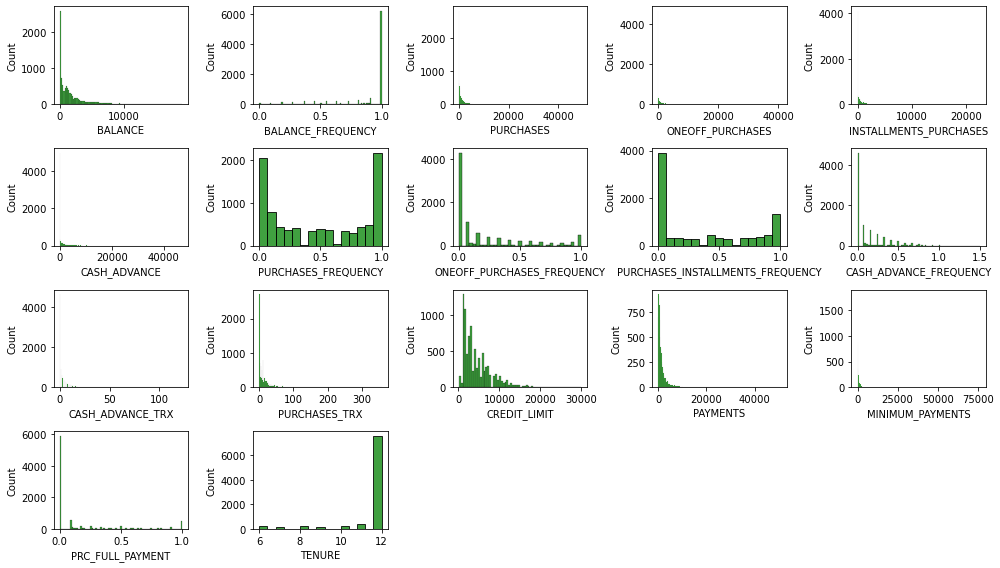

In [12]:
plt.figure(figsize=(14,8))
for i in range(0,len(num_data)):
    plt.subplot(4,5, i+1)
    sns.histplot(x=data[num_data[i]], color='green')
    plt.tight_layout()

Almost all columns are skewed. Only `PURCHASE_FREQUENCY` that has normal distribution.

From the histogram, it seems that `TENURE` is a categorical column.

#### **6. Boxplot Analysis**

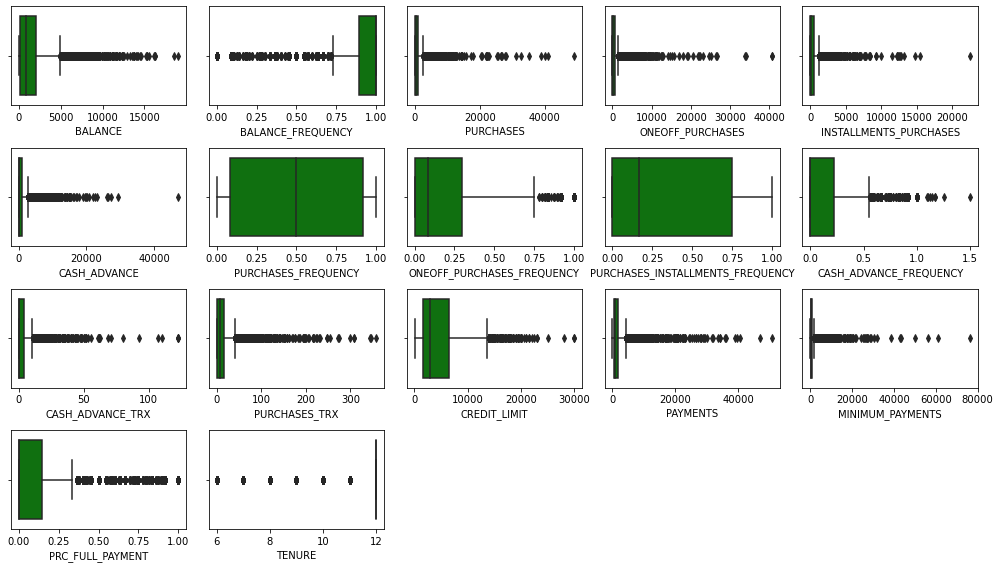

In [13]:
plt.figure(figsize=(14,8))
for i in range(0,len(num_data)):
    plt.subplot(4,5, i+1)
    sns.boxplot(x=data[num_data[i]], color='green')
    plt.tight_layout()

We have many outliers in several columns. It will be handled later on in the Data Pre-processing section.

#### **7. Tenure**

In [14]:
data.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

`Tenure` is a categorical data.

#### **8. Pearson Correlation Analysis**

In unsupervised learning, we will check the multicollinearity of each feature simultaneously using Variance Inflation Factor (VIF). Now we want to see first the correlation between features using the Pearson Correlation method.

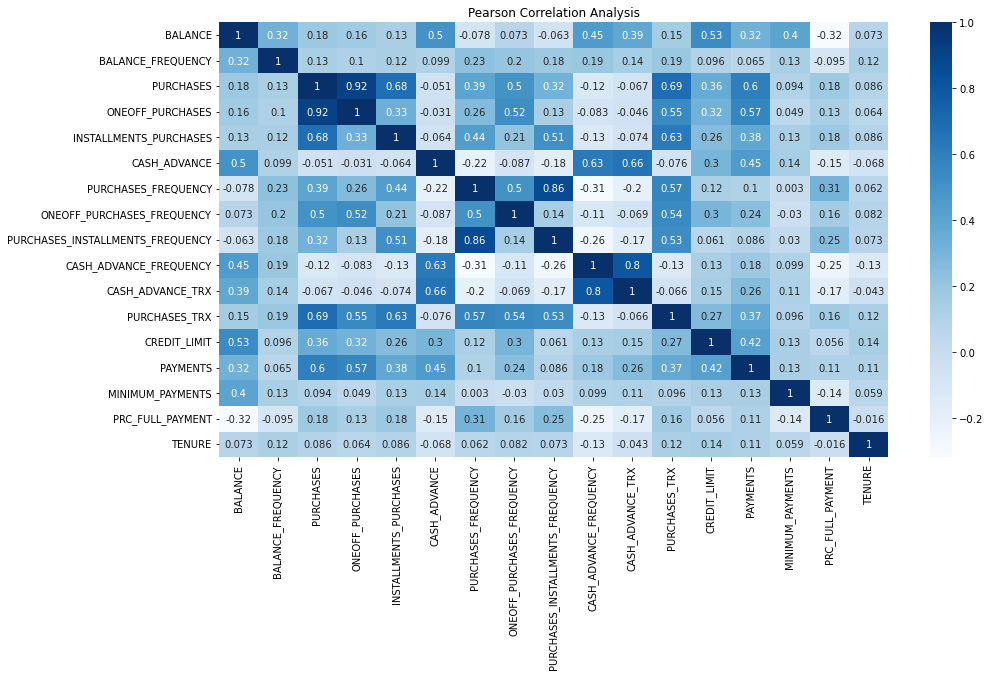

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Pearson Correlation Analysis')
plt.show()

From the heatmap above it appears that some features have strong and also weak correlation and with each other. Strong correlation means the feature correlate well with other feature. On the other hand, in unsupervised learning we don't want the features to have strong correlation with other features because we don't want to input features that have similar characteristic with each other so that our model would be lighter and simpler.

## **5. Data Pre-processing**

### **5.1 Dropping Features**

As mentioned in EDA, we will drop `CUST_ID`

In [16]:
data.drop('CUST_ID', axis=1, inplace=True)

### **5.2 Inference Dataset**

We will take 10 samples out to be our data inference. 

In [17]:
data_inf = data.sample(10, random_state=77)

In [18]:
data_train = data.drop(data_inf.index)

To prevent unwanted error, we will reset the index.

In [19]:
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### **5.3 Handling Outliers**

In [20]:
# This is the function to detect how many outliers in each column

def detect_otl(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        upper_boundary = data[column].mean() + 1.5 * data[column].std()
        lower_boundary = data[column].mean() - 1.5 * data[column].std()
        print(f'[Gaussian] Skewness of {column} =', skewness)
        print('% above upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('% below lower boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-'*75)
    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
        upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
        print(f'[Skewed] Skewness of {column} =', skewness)
        print('% above upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('% below lower boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-'*75)

In [21]:
for i in num_data:
    detect_otl(data_train, i)

[Skewed] Skewness of BALANCE = 2.3918579419047536
% above upper boundary : 7.774049217002236
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of BALANCE_FREQUENCY = -2.022429825667068
% above upper boundary : 0.0
% below lower boundary : 16.68903803131991
---------------------------------------------------------------------------
[Skewed] Skewness of PURCHASES = 8.146763629220741
% above upper boundary : 9.015659955257272
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of ONEOFF_PURCHASES = 10.040499590966833
% above upper boundary : 11.342281879194632
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of INSTALLMENTS_PURCHASES = 7.318371746774012
% above upper boundary : 9.675615212527964
% below lower boundary : 0.0
---------------------------------------------------

Below is the features whose outliers will be capped and trimmed.

In [22]:
otl_cap = ['MINIMUM_PAYMENTS', 'PAYMENTS', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
           'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'PURCHASES', 'BALANCE']
otl_trim = ['CREDIT_LIMIT']

In [23]:
winsorizer = Winsorizer(capping_method='iqr', # We use IQR because all of the features are skewed
                        tail='both',
                        fold=1.5,
                        variables=otl_cap,
                        missing_values='ignore')

data_train_capped = winsorizer.fit_transform(data_train)

In [24]:
outlier_trimmer = OutlierTrimmer(capping_method='iqr', # We use IQR because all of the features are skewed
                                 tail='both', 
                                 fold=1.5, 
                                 variables=otl_trim, 
                                 missing_values='ignore')

data_train_trimmed = outlier_trimmer.fit_transform(data_train_capped)
print('Size dataset - Before trimming : ', data_train_capped.shape)
print('Size dataset - After trimming  : ', data_train_trimmed.shape)

Size dataset - Before trimming :  (8940, 17)
Size dataset - After trimming  :  (8693, 17)


### **5.4 Handling Missing Values**

First, we will check in which column the null values lies in.

In [25]:
data_train_trimmed.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

We have null values in `CREDIT_LIMIT` and `MINIMUM_PAYMENTS`

We will do imputation on all occurrences of missing values with:
* **Mean** : if the variable has a **Normal/Gaussian distribution**.
* **Median** : if the variable has a **skewed distribution**.

In [26]:
def impute_na_num(data, variable):
    skewness = data[variable].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        data[variable].fillna(data[variable].mean(), inplace=True)
    else:
        data[variable].fillna(data[variable].median(), inplace=True)

    return data

In [27]:
for i in ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']:
    data_train_ipt = impute_na_num(data_train_trimmed, i)

In [28]:
data_train_ipt.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [29]:
data_train_ipt.reset_index(drop=True, inplace=True)

### **5.5 Multicollinearity**

Now we will check the correlation between features using VIF.

In [30]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_train_ipt.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_train_ipt.values, i) for i in range(len(data_train_ipt.columns))]

vif_data

,feature,VIF
0,BALANCE,9.470607
1,BALANCE_FREQUENCY,18.855062
2,PURCHASES,27.405619
3,ONEOFF_PURCHASES,15.647819
4,INSTALLMENTS_PURCHASES,11.411975
5,CASH_ADVANCE,5.072518
6,PURCHASES_FREQUENCY,26.987742
7,ONEOFF_PURCHASES_FREQUENCY,9.895601
8,PURCHASES_INSTALLMENTS_FREQUENCY,22.868023
9,CASH_ADVANCE_FREQUENCY,12.027693


VIF less than 5: `PRC_FULL_PAYMENT`, `CREDIT_LIMIT`, `PAYMENTS`

We are expecting to have 4 features after PCA.

### **5.6 Feature Scaling**

`TENURE` is a categorical data, thus we will exclude it from feature scaling.

In [31]:
data_for_scaling = data_train_ipt.copy()
data_for_scaling.drop('TENURE', axis=1,inplace=True)

In [32]:
standard_scaler = StandardScaler()

data_train_scaled = standard_scaler.fit_transform(data_for_scaling)

In [33]:
data_train_scaled_df = pd.DataFrame(data_train_scaled, columns=data_for_scaling.columns)
data_train_scaled_df['TENURE'] = data_train_ipt['TENURE']

In [34]:
data_train_final = data_train_scaled_df.to_numpy()
data_train_final.shape

(8693, 17)

### **5.7 PCA (Principal Component Analysis)** 

We will take 80% information of the whole dataset. So we will use `n_components = 0.8`

In [35]:
pca_1 = PCA(n_components=0.8).fit(data_train_final)
pca_1.explained_variance_ratio_

array([0.3000105 , 0.22529307, 0.10435944, 0.0876043 , 0.06531798,
       0.05233353])

##### **Explained Variance ratio**

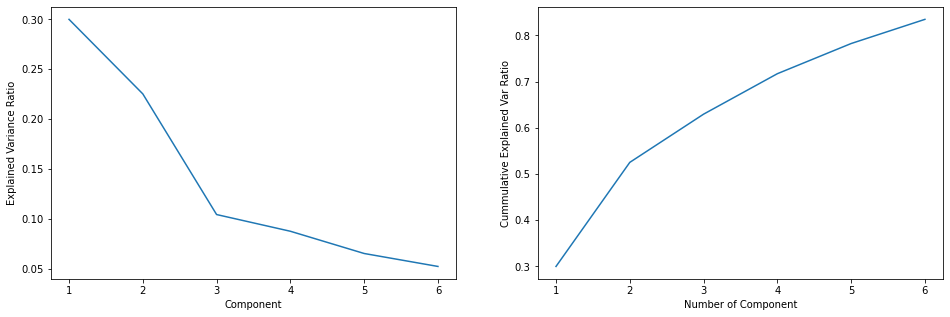

In [36]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,7),pca_1.explained_variance_ratio_)
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,7),np.cumsum(pca_1.explained_variance_ratio_))
ax[1].set_xlabel('Number of Component')
ax[1].set_ylabel('Cummulative Explained Var Ratio')
plt.show()

The Cummulative EVR shows that 80% informations needs 6 features.

We will make a variable that contains 80% data.

In [37]:
data_train_reduced = pca_1.transform(data_train_final)
data_train_reduced.shape

(8693, 6)

From the analysis above, it appears that 80% information needs 6 features.

## **6. Model Definition**

In [38]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

### **6.1 Kmeans Clustering**

#### **6.1.1 Finding The Best Number of Cluster for Kmeans**

##### **Elbow Method**

Text(0, 0.5, 'Inertia')

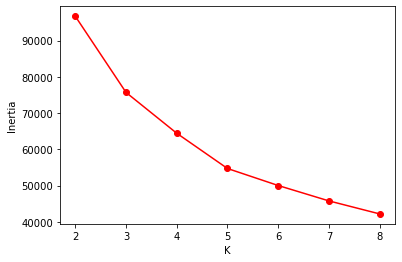

In [39]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(data_train_reduced).inertia_ for i in K]
plt.plot(K,inertia, marker='o', color='r')
plt.xlabel('K')
plt.ylabel('Inertia')

It's hard to determine where the elbow is when the plot is bending smoothly like the plot above. Therefore, we will check the silhouette score and plot.

##### **Siluet Score & Plot**

Text(0, 0.5, 'Silhouette Score')

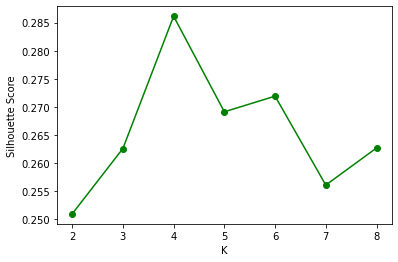

In [40]:
K=[2,3,4,5,6,7,8]
s_score=[silhouette_score(data_train_reduced, KMeans(n_clusters=i).fit(data_train_reduced).labels_) for i in K]
plt.plot(K,s_score, marker='o', color='g')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

For n_clusters = 2 The average silhouette_score is : 0.2509934278723453
For n_clusters = 3 The average silhouette_score is : 0.26261889996616083
For n_clusters = 4 The average silhouette_score is : 0.28611014000952156
For n_clusters = 5 The average silhouette_score is : 0.2691119242355794
For n_clusters = 6 The average silhouette_score is : 0.27188649206933463
For n_clusters = 7 The average silhouette_score is : 0.2562589044520732
For n_clusters = 8 The average silhouette_score is : 0.2627185202877888


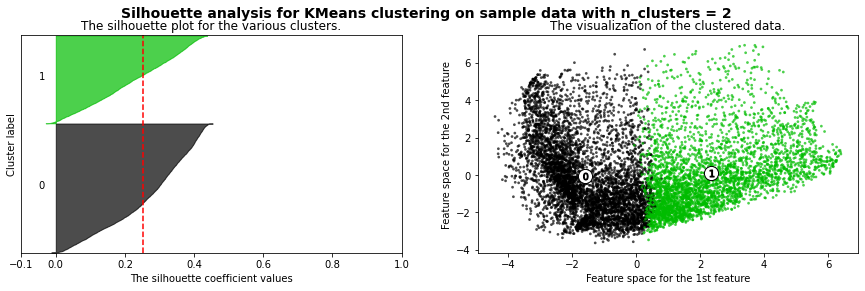

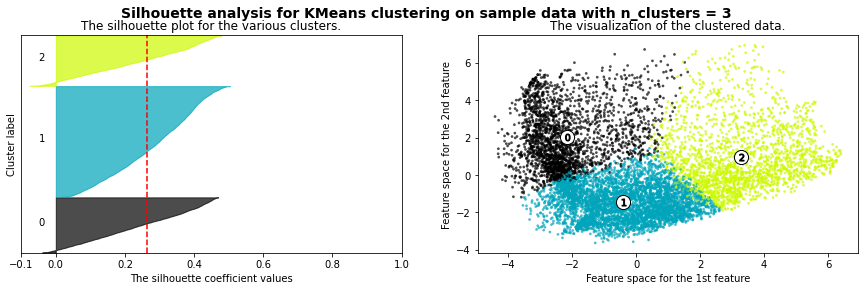

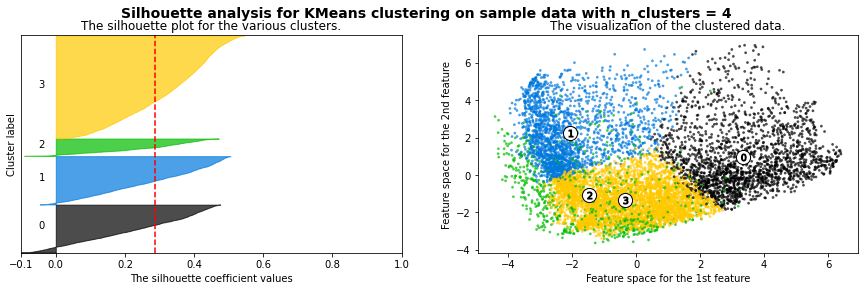

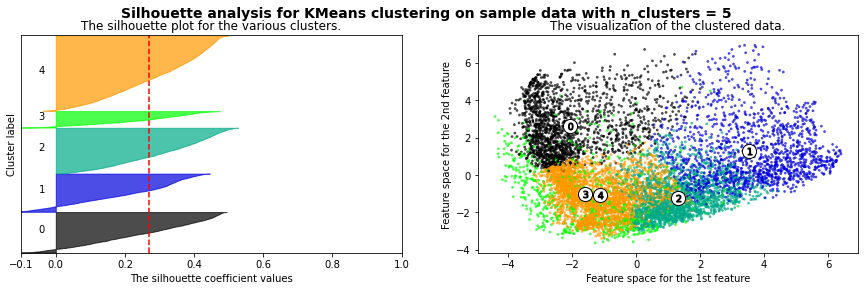

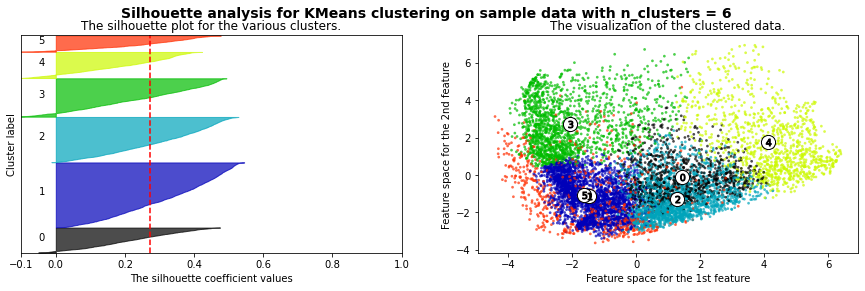

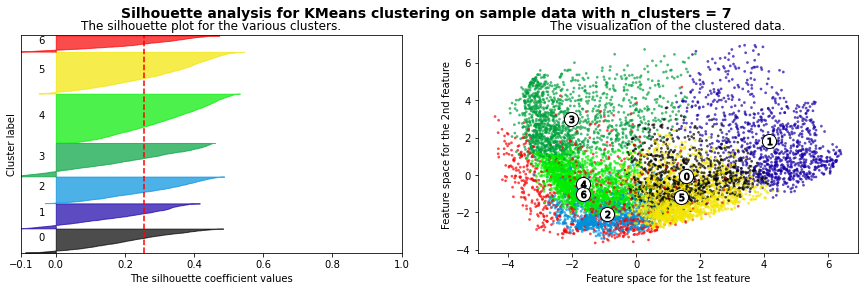

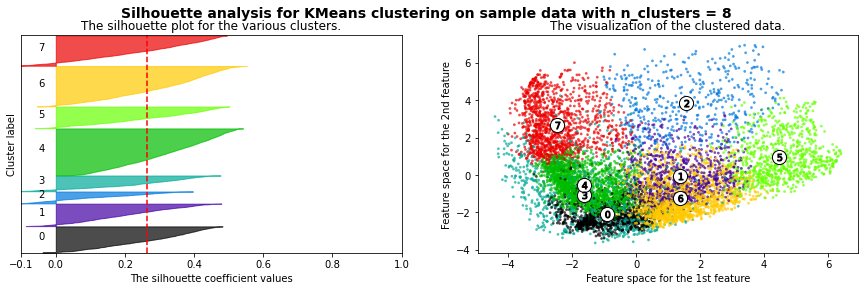

In [41]:
plot_silhouette(K, data_train_reduced)

The highest silhouette score is on `n_cluster = 4`. However, if we see the visualization on the right side, it did not show a good clustering since we could see the green-colored cluster is mixed with the blue and yellow clusters. As well as other clusters, some clusters overlap with other clusters. 

The cluster that show a good visualization is `n_cluster = 2` and `n_cluster = 3`.  `n_cluster = 3` has higher silhouette score of 0.26 and it is higher than `n_cluster = 2` that has a silhouette score of 0.25. Therefore, for Kmeans Clustering will use `n_cluster = 3` to define the Kmeans Clustering model.

We will define Kmeans with `n_cluster = 3`

#### **6.1.2 Kmeans Clustering Model Definition**

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)

### **6.2 Agglomerative Clustering**

#### **6.2.1 Finding The Best Number of Cluster for Agglomerative Clustering**

To find the best cluster for Agglomerative Clustering, we will use dendogram and choose the longest lines that divide the clusters.

##### **Dendogram**

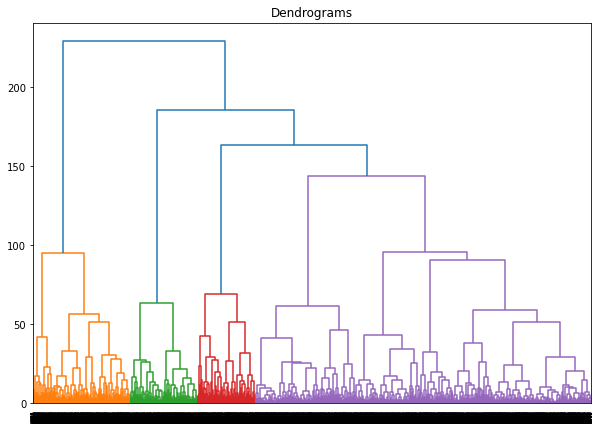

In [43]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_train_reduced, method='ward'))

Based on the dendogram above, we will use `n_cluster = 5` because there are 5 lines between 100 and 150 that divide the data into 5 groups.

#### **6.2.2 Agglomerative Clustering Model Definition**

In [44]:
agglo = AgglomerativeClustering(n_clusters=5)

### **6.3 Gaussian Mixture Model (GMM)**

#### **6.3.1 Finding The Best Number of Component for GMM**

To find the best n_component (k) for GMM, we will calculate AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion). To determine the best `k` for GMM we will choose `k` with the lowest AIC.

In [45]:
# Train GMM with Various Number of Clusters

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(data_train_reduced)
             for k in range(1, 11)]

In [46]:
# Get BIC and AIC Scores

bics = [model.bic(data_train_reduced) for model in gms_per_k]
aics = [model.aic(data_train_reduced) for model in gms_per_k]

for k in range(0, 10):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  1 	BIC :  184891.21253335764 	AIC :  184700.31515201452
Cluster :  2 	BIC :  155407.28860252746 	AIC :  155018.4235664581
Cluster :  3 	BIC :  140837.38458401087 	AIC :  140250.5518932153
Cluster :  4 	BIC :  123743.14777057231 	AIC :  122958.34742505054
Cluster :  5 	BIC :  117807.97302304073 	AIC :  116825.20502279274
Cluster :  6 	BIC :  111873.36015049051 	AIC :  110692.6244955163
Cluster :  7 	BIC :  108070.42279178725 	AIC :  106691.71948208683
Cluster :  8 	BIC :  105792.80112735984 	AIC :  104216.1301629332
Cluster :  9 	BIC :  102462.21800359536 	AIC :  100687.57938444252
Cluster :  10 	BIC :  101068.15831457834 	AIC :  99095.55204069927


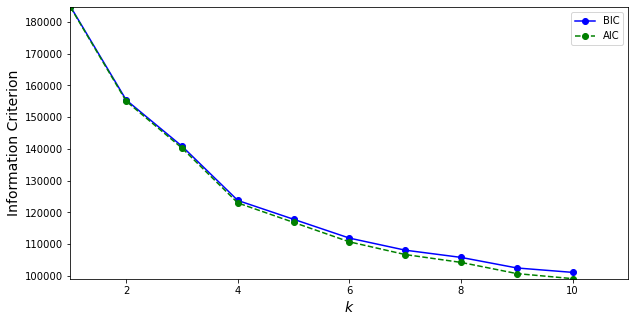

In [47]:
# Plot BIC Score and AIC Score

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 11, np.min(aics) - 50, np.max(aics) + 50])
plt.legend()
plt.show()

From the graph above, it appears that the `k` with the lowest AIC is **10**. However, in GMM we should also choose the best `covariance_type`, thus we will search for the best combination of values for both the `n_component` and `covariance_type` hyperparameter.

Since we can't use `GridSearchCV` for unsupervised learning, we will do 'for looping' to search for the best values of each hyperparameters.

In [48]:
min_aic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        aic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(data_train_reduced).aic(data_train_reduced)
        if aic < min_aic:
            min_aic = aic
            best_k = k
            best_covariance_type = covariance_type

print('best - n_components    : ', best_k)
print('best - covariance_type : ', best_covariance_type)

best - n_components    :  10
best - covariance_type :  full


Just like the above plot, we get the best `n_component = 10`. For the `covariance_type`, the best value is `full`. According to Gaussian Mixture's documentation in scikit-learn.org, `full` means each component has its own general covariance matrix and it is the default `covariance_type`

#### **6.3.2 GMM Model Definition**

In [49]:
gm = GaussianMixture(n_components=10, n_init=10, random_state=42, covariance_type='full')

## **7. Model Training**

### **7.1 Kmeans Clustering**

We will train the Kmeans Clustering with the data that has been reduced to 80% by using `PCA(n_components=0.8)`

In [50]:
kmeans.fit(data_train_reduced)

KMeans(n_clusters=3, random_state=42)

Next, we will get the clusters in Kmeans Clustering.

In [51]:
clusters_kmeans = kmeans.labels_

In [52]:
kmeans.n_iter_

8

In this case, Kmeans Clustering only took 8 iterations to complete the modelling

### **7.2 Agglomerative Clustering**

We will train the Agglomerative Clustering with the data that has been reduced to 80% by using `PCA(n_components=0.8)`

In [53]:
agglo.fit(data_train_reduced)

AgglomerativeClustering(n_clusters=5)

Next, we will get the clusters in Agglomerative Clustering.

In [54]:
clusters_agglo = agglo.labels_

### **7.3 Gaussian Mixture Model (GMM)**

We will train the GMM with the data that has been reduced to 80% by using `PCA(n_components=0.8)`

In [55]:
gm.fit(data_train_reduced)

GaussianMixture(n_components=10, n_init=10, random_state=42)

Next, we will get the clusters in GMM.

In [56]:
clusters_gm = gm.predict(data_train_reduced)

Did the algorithm already converged?

In [57]:
gm.converged_

True

The model is converged, it means the model is already satisfied at a point.

In [58]:
# Display Number of Step used to Reach the Convergence

gm.n_iter_

59

The GMM took 59 iterations to reach the convergence.

## **9. Model Evaluation**

First we will make reduce the dimension of `data_train_final` into 2 columns using `PCA(n_components=2)` and make a dataframe.

In [59]:
# Dimensionality reduction to 2 columns
pca_2 = PCA(n_components=2)
pca_2.fit(data_train_final)
pca_2_tf = pca_2.transform(data_train_final)

# Make a dataframe
data_pca_df = pd.DataFrame(data = pca_2_tf, columns = ['PC 1', 'PC 2'])
data_pca_df.head()

,PC 1,PC 2
0,-1.407777,-2.230215
1,-2.253623,2.635995
2,1.289534,0.415686
3,-0.282040,-0.248071
4,-1.504141,-1.617752


### **9.1 Kmeans Clustering**

#### **9.1.1 Kmeans Clustering Visualization with PCA**

We will concatenate `data_pca_df` with `clusters_kmeans`.

In [60]:
data_pca_kmeans = data_pca_df.copy()
data_pca_kmeans['clusters'] = clusters_kmeans
data_pca_kmeans.head()

,PC 1,PC 2,clusters
0,-1.407777,-2.230215,1
1,-2.253623,2.635995,0
2,1.289534,0.415686,2
3,-0.282040,-0.248071,1
4,-1.504141,-1.617752,1


Next, we will plot the clusters.

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

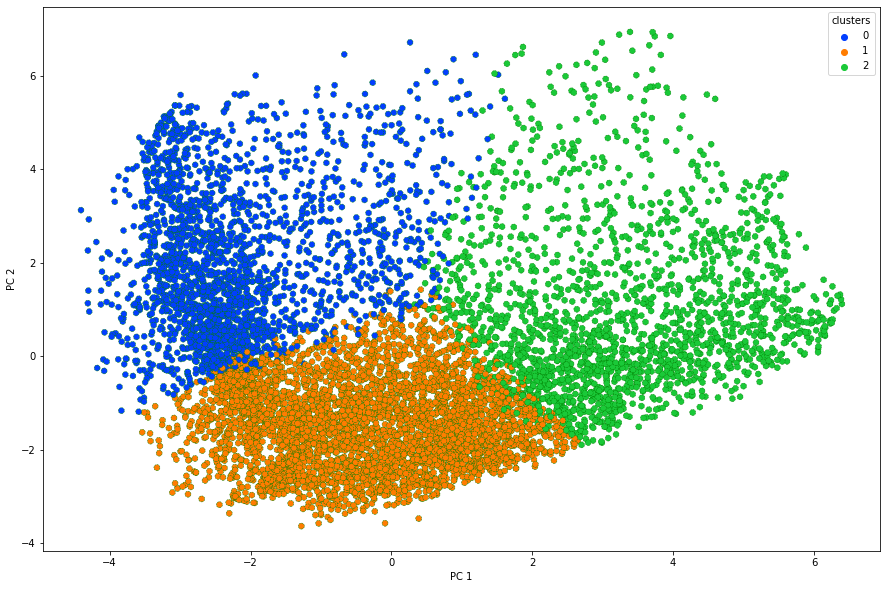

In [61]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca_kmeans,
    palette='bright',
    ax=ax)

The plot above shows a good clustering. We can see that all three clusters are quite well separated, although we can still see some data points that crossed other clusters.

#### **9.1.2 EDA for Kmeans Clustering**

We will see the mean and median of each column based on the clusters.

In [62]:
data_clustering_kmeans = data_train_ipt.copy()
data_clustering_kmeans['CLUSTERS'] = clusters_kmeans

In [63]:
data_clustering_kmeans.groupby('CLUSTERS').agg(['mean','median'])

BALANCE              BALANCE_FREQUENCY           PURCHASES  \
                 mean       median              mean median         mean   
CLUSTERS                                                                   
0         2687.071838  2473.175598          0.944484    1.0   227.927342   
1          565.272220   185.824872          0.798353    1.0   371.324894   
2         1596.800104  1026.396766          0.973917    1.0  2009.517615   

                  ONEOFF_PURCHASES          INSTALLMENTS_PURCHASES          \
           median             mean   median                   mean  median   
CLUSTERS                                                                     
0            0.00       137.844772     0.00              78.237726    0.00   
1          266.54       163.686297     0.00             199.317917   82.02   
2         2116.42       962.388109  1191.29             717.806816  827.42   

          ... CREDIT_LIMIT             PAYMENTS              MINIMUM_PAYMENTS  \
          ...         mean  median         mean       median             mean   
CLUSTERS  ...                                                                   
0         ...  5101.289274  4500.0  1695.226955  1271.396821       939.570525   
1         ...  2937.983169  2000.0   668.324932   453.729862       321.790631   
2         ...  5781.414592  5500.0  2270.893607  2000.872338       634.951643   

                     PRC_FULL_PAYMENT            TENURE         
              median             mean median       mean median  
CLUSTERS                                                        
0         799.436291         0.031981    0.0  11.340368   12.0  
1         190.300614         0.170009    0.0  11.432360   12.0  
2         343.246157         0.239095    0.0  11.866071   12.0  

[3 rows x 34 columns]

We can see in `BALANCE`, `PAYMENTS`, and `CREDIT_LIMIT ` the clusters have a fairly far and reasonable distance between the clusters. Based on these clusters, we can do customer segmentations to define marketing strategy.

In [64]:
data_clustering_kmeans[['CLUSTERS']].value_counts()

CLUSTERS
1           4450
0           2227
2           2016
dtype: int64

Seeing from the `CREDIT_LIMIT`, there are 2227 customers in cluster 0 whose average credit limit is 5101.29, 4450 customers in cluster 1 whose average credit limit is 2937.98, and 2016 customers in cluster 2 whose average credit limit is 5781.41.

Customers that are in cluster 0 has low credit limit and low balance as well. It makes sense because if we see the pearson correlation coefficient in the EDA section, we can see that `CREDIT_LIMIT` has a strong correlation with `BALANCE`.

In [65]:
data_clustering_kmeans[['PURCHASES_FREQUENCY', 'CLUSTERS']].groupby('CLUSTERS').mean()

,PURCHASES_FREQUENCY
CLUSTERS,
0,0.184240
1,0.448577
2,0.902660


### **9.2 Agglomerative Clustering**

#### **9.2.1 Agglomerative Clustering Visualization with PCA**

We will concatenate `data_pca_df` with `clusters_agglo`.

In [66]:
data_pca_agglo = data_pca_df.copy()
data_pca_agglo['clusters'] = clusters_agglo
data_pca_agglo.head()

,PC 1,PC 2,clusters
0,-1.407777,-2.230215,0
1,-2.253623,2.635995,2
2,1.289534,0.415686,0
3,-0.282040,-0.248071,0
4,-1.504141,-1.617752,0


Next, we will plot the clusters.

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

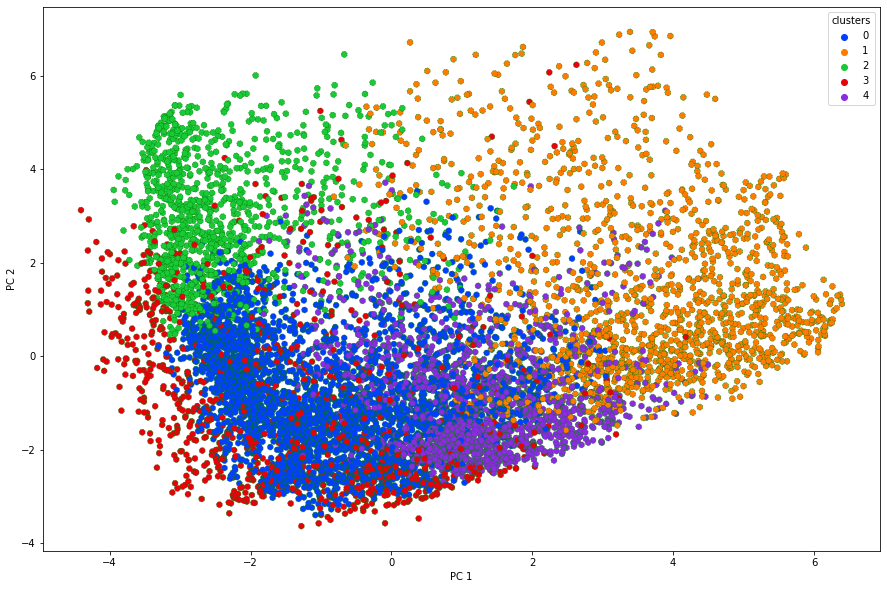

In [67]:
fig1, ax1 = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca_agglo,
    palette='bright',
    ax=ax1)

The clustering result above is not really good. As we can see above cluster 3 are spread all over the data points, same goes for cluster 4. We cannot really decide which data lies in which clusters because it is too overlapping and confusing.

#### **9.1.2 EDA for Agglomerative Clustering**

In [68]:
data_clustering_agglo = data_train_ipt.copy()
data_clustering_agglo['CLUSTERS'] = clusters_agglo

In [69]:
data_clustering_agglo.groupby('CLUSTERS').agg(['mean','median'])

BALANCE              BALANCE_FREQUENCY           PURCHASES  \
                 mean       median              mean median         mean   
CLUSTERS                                                                   
0          957.205314   602.919459          0.803380  1.000   342.173851   
1         1858.235884  1281.276331          0.980581  1.000  2096.346037   
2         3229.296901  3402.546270          0.974070  1.000   212.530481   
3          866.675586   391.508345          0.768043  0.875   392.448953   
4          780.941102   256.028048          0.944920  1.000   768.375391   

                  ONEOFF_PURCHASES          INSTALLMENTS_PURCHASES          \
           median             mean   median                   mean  median   
CLUSTERS                                                                     
0          133.63       248.128480     0.00              70.352535    0.00   
1         2400.37      1064.021777  1356.33             735.319932  787.99   
2            0.00       152.479769     0.00              52.667902    0.00   
3          170.07       192.975176     0.00             166.679154    0.00   
4          571.32        71.862508     0.00             598.754092  504.00   

          ... CREDIT_LIMIT             PAYMENTS              MINIMUM_PAYMENTS  \
          ...         mean  median         mean       median             mean   
CLUSTERS  ...                                                                   
0         ...  3457.946119  2500.0   853.695768   549.557621       425.986787   
1         ...  6224.774371  6000.0  2484.363011  2313.605337       679.303860   
2         ...  6123.207263  6000.0  2159.763637  1784.211938      1092.088815   
3         ...  2658.476403  1500.0   656.374996   331.450159       323.165889   
4         ...  3293.490660  2500.0  1005.120015   737.914629       497.228798   

                      PRC_FULL_PAYMENT            TENURE         
               median             mean median       mean median  
CLUSTERS                                                         
0          282.074643         0.107894    0.0  11.928804   12.0  
1          416.412205         0.220860    0.0  11.937541   12.0  
2         1076.437173         0.036330    0.0  11.843511   12.0  
3          180.970792         0.180833    0.0   7.931996    8.0  
4          194.283650         0.243385    0.0  11.938591   12.0  

[5 rows x 34 columns]

In [70]:
data_clustering_agglo[['CLUSTERS']].value_counts()

CLUSTERS
0           3680
4           1547
1           1521
2           1048
3            897
dtype: int64

We have 5 clusters generated by the Agglomerative Clustering. We have most customers in cluster 0, which shows a moderate `BALANCE` and `CREDIT_LIMIT`. And we have least customers in cluster 3, which shows low `BALANCE` and `CREDIT_LIMIT`. 

This clustering is not really reliable because we can see from the plot above the clusters are not well separated and very overlapping with each other.

### **9.3 Gaussian Mixture Model (GMM)**

#### **9.2.1 GMM Visualization with PCA**

We will concatenate `data_pca_df` with `clusters_gm`.

In [71]:
data_pca_gm = data_pca_df.copy()
data_pca_gm['clusters'] = clusters_gm
data_pca_gm.head()

,PC 1,PC 2,clusters
0,-1.407777,-2.230215,6
1,-2.253623,2.635995,1
2,1.289534,0.415686,7
3,-0.282040,-0.248071,5
4,-1.504141,-1.617752,8


Next, we will plot the clusters.

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

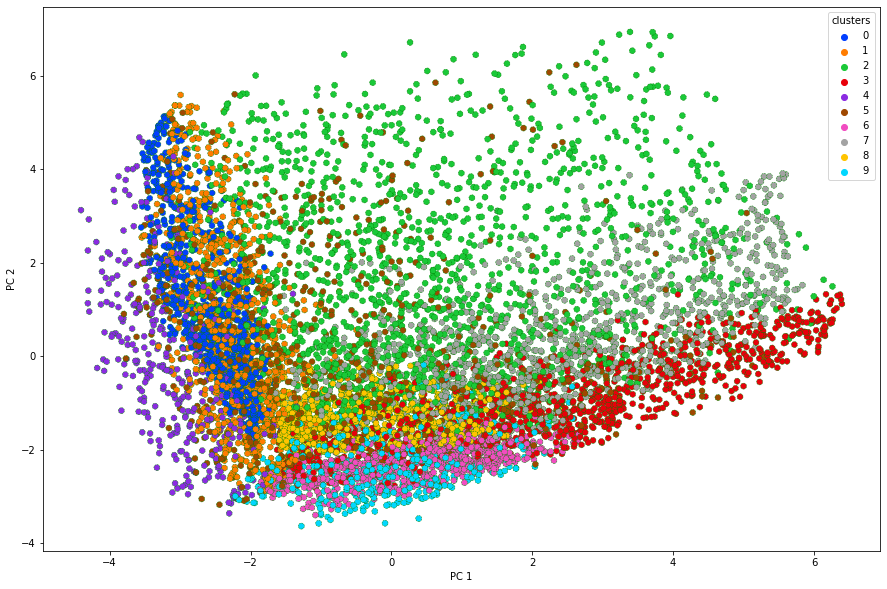

In [72]:
fig2, ax2 = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca_gm,
    palette='bright',
    ax=ax2)

The visualization is very confusing. We really cannot see the boundaries of each cluster. The clusters are very overlapping and confusing.

#### **9.1.2 EDA for GMM**

We will see the mean and median of each column based on the clusters.

In [73]:
data_clustering_gm = data_train_ipt.copy()
data_clustering_gm['CLUSTERS'] = clusters_gm

In [74]:
data_clustering_gm.groupby('CLUSTERS').agg(['mean','median'])

BALANCE              BALANCE_FREQUENCY              PURCHASES  \
                 mean       median              mean    median         mean   
CLUSTERS                                                                      
0         2358.765392  1836.565272          0.999159  1.000000     0.000000   
1         1448.997410   955.117067          0.789837  1.000000    55.070092   
2         2379.712563  1972.382214          0.988467  1.000000  1130.136777   
3          190.210654   122.124272          0.795436  0.909091  1341.588325   
4         1620.513359  1219.143484          0.781264  0.888889    18.058015   
5         1315.507682   854.567510          0.795245  0.888889   718.894100   
6           38.924788    23.255611          0.660408  0.727273   328.738285   
7         1813.660332  1462.746660          0.993211  1.000000  1469.430704   
8          837.034280   843.793952          0.998792  1.000000   342.690532   
9          199.886622    58.313733          0.776277  0.888889   518.277160   

                   ONEOFF_PURCHASES          INSTALLMENTS_PURCHASES           \
            median             mean   median                   mean   median   
CLUSTERS                                                                       
0            0.000         0.000000    0.000               0.000000    0.000   
1            0.000        55.034954    0.000               0.070749    0.000   
2          846.665       564.398655  396.755             439.360532  298.860   
3         1148.310       635.844022  500.000             502.672150  384.640   
4            0.000        18.058015    0.000               0.000000    0.000   
5          432.050       425.101259  188.000             211.891477    9.650   
6          266.035         0.101449    0.000             328.414701  265.945   
7         1346.440       734.346363  715.810             535.908833  461.340   
8          275.030       178.118140   68.710             164.353328   83.335   
9          360.960       185.828577    0.000             305.730211  200.000   

          ... CREDIT_LIMIT             PAYMENTS              MINIMUM_PAYMENTS  \
          ...         mean  median         mean       median             mean   
CLUSTERS  ...                                                                   
0         ...  3905.960946  3000.0   822.014644   660.781751       804.392583   
1         ...  4111.816628  3000.0  1666.075192  1144.381323       558.070737   
2         ...  5038.398915  4500.0  1961.706204  1583.402607       916.918100   
3         ...  5248.373687  5000.0  1638.204714  1307.801313       161.390581   
4         ...  3159.443099  2500.0   458.490433   329.077571       543.559210   
5         ...  4074.009662  3000.0  1656.875233  1134.962538       531.186179   
6         ...  2801.039379  2500.0   399.284543   316.975935       149.263702   
7         ...  4974.190402  4500.0  1719.418390  1350.435597       811.491114   
8         ...  2573.671096  1800.0   426.410861   394.946662       371.248491   
9         ...  2204.659950  1500.0   409.345688   286.841222       154.550686   

                     PRC_FULL_PAYMENT               TENURE         
              median             mean    median       mean median  
CLUSTERS                                                           
0         608.345463         0.000000  0.000000  12.000000   12.0  
1         349.836034         0.045999  0.000000  12.000000   12.0  
2         795.050421         0.064238  0.000000  12.000000   12.0  
3         167.893173         0.479376  0.454545  12.000000   12.0  
4         337.424016         0.000000  0.000000   8.878935    9.0  
5         308.017569         0.181586  0.000000   9.470765   10.0  
6         152.646614         0.381912  0.300000  12.000000   12.0  
7         615.208288         0.021795  0.000000  12.000000   12.0  
8         294.427116         0.004540  0.000000  12.000000   12.0  
9         121.334941         0.327462  0.100000   8.753149    9.0  

[10 ro

In [75]:
data_clustering_gm[['CLUSTERS']].value_counts()

CLUSTERS
2           1474
3           1199
7           1165
1            975
0            973
6            828
5            667
8            602
4            413
9            397
dtype: int64

We have 10 clusters generated by GMM. It is quite too many for doing segmentation with such number of clusters. As we can see in the table above, all mean and median in `BALANCE` and `CREDIT_LIMIT` did not differ that much, so we cannot really see the difference of each cluster.

## **9. Model Inference**

For model inference, we will use Kmeans Clustering, because it showed the best clustering.

#### **Handling Outliers**

In [76]:
data_inf.shape

(10, 17)

In [77]:
for i in num_data:
    detect_otl(data_inf, i)

[Skewed] Skewness of BALANCE = 1.1080078773148705
% above upper boundary : 10.0
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of BALANCE_FREQUENCY = -1.5750007914336972
% above upper boundary : 0.0
% below lower boundary : 10.0
---------------------------------------------------------------------------
[Skewed] Skewness of PURCHASES = 1.597677519942337
% above upper boundary : 20.0
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of ONEOFF_PURCHASES = 1.1167477262748773
% above upper boundary : 0.0
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of INSTALLMENTS_PURCHASES = 1.7590038982901146
% above upper boundary : 20.0
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of CASH_ADVANCE = 1.53

In [78]:
inf_otl_cap = ['MINIMUM_PAYMENTS', 'PAYMENTS', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
               'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES', 'PURCHASES', 'BALANCE', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT' ]

In [79]:
winsorizer = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=inf_otl_cap,
                        missing_values='ignore')

data_inf_capped = winsorizer.fit_transform(data_inf)

#### **Handling Missing Values**

In [80]:
data_inf_capped.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### **Feature Scaling**

We will exclude `TENURE` from feature scaling because it is a categorical data.

In [81]:
inf_for_scaling = data_inf_capped.copy()
inf_for_scaling.drop('TENURE', axis=1,inplace=True)

In [82]:
standard_scaler = StandardScaler()

data_inf_scaled = standard_scaler.fit_transform(inf_for_scaling)

In [83]:
data_inf_scaled_df = pd.DataFrame(data_inf_scaled, columns=inf_for_scaling.columns)
data_inf_scaled_df['TENURE'] = data_inf_capped['TENURE']

In [84]:
data_inf_final = data_inf_scaled_df.to_numpy()
data_inf_final.shape

(10, 17)

#### **PCA for Model Inference**

Because our kmeans model is already fit with 6 features, so for PCA in the inference model we directly use `PCA(n_components = 6)`

In [85]:
pca_inf = PCA(n_components=6).fit_transform(data_inf_final)

In [86]:
pca_inf.shape

(10, 6)

In [87]:
inf_cluster = kmeans.predict(pca_inf)

In [88]:
data_clustering_inf = data_inf_capped.copy()
data_clustering_inf['CLUSTERS'] = inf_cluster

In [89]:
data_clustering_inf.groupby('CLUSTERS').agg(['mean','median'])

BALANCE              BALANCE_FREQUENCY              PURCHASES  \
                 mean       median              mean    median         mean   
CLUSTERS                                                                      
0          223.719049    79.554406          0.818182  0.818182  1484.487917   
1         1209.903389  1486.009630          1.000000  1.000000  1273.574583   
2          520.639620   534.991062          0.918831  0.909091     6.700000   

                  ONEOFF_PURCHASES         INSTALLMENTS_PURCHASES          \
           median             mean  median                   mean  median   
CLUSTERS                                                                    
0         1223.41       825.373333  769.41             498.787500  454.00   
1          757.60       234.000000    0.00             467.914167  305.78   
2            0.00         6.700000    0.00               0.000000    0.00   

          ... CREDIT_LIMIT             PAYMENTS              MINIMUM_PAYMENTS  \
          ...         mean  median         mean       median             mean   
CLUSTERS  ...                                                                   
0         ...  7058.333333  6000.0  2285.146661  1222.343069       137.271859   
1         ...  2950.000000  2350.0  1561.732305   932.414285       593.107979   
2         ...  1675.000000  1600.0  1162.220078  1065.482532       199.801266   

                     PRC_FULL_PAYMENT           TENURE         
              median             mean    median   mean median  
CLUSTERS                                                       
0         129.304142         0.350379  0.525568  12.00   12.0  
1         693.998775         0.083333  0.000000  12.00   12.0  
2         228.277404         0.043561  0.041667  10.75   12.0  

[3 rows x 34 columns]

Same with the train model, the clustering in Model Inference shows a good result. We can see the difference between each cluster and do the segmentation well. However, we can't really visualize this model inference because the size of the data is too small, we won't be able to see the clusters clearly.

## **10. Conclusion**

In this case, Kmeans Clustering showed better clustering result than Agglomerative Clustering and Gaussian Mixture Model. The clusters have clear boundaries, we can really see the difference of each cluster. 

For Agglomerative Clustering, in this case it did not perform well. The clustering result was confusing and it is quite difficult to see the boundaries of each cluster. Same goes for Gaussian Mixture Model, we could not really see the boundaries of each cluster and it is so hard to understand the clusters.

For further business purposes, it is recommended to use Kmeans Clustering to do a customer segmentation. We already have 3 clusters, and based on the `CREDIT_LIMIT` we can segment the customers with low, moderate, and high credit limits. Based on this segmentation, we can start to plan our marketing strategy. We can also segment the customers based on the other behavioral variables, such as `BALANCE`, `PURCHASE`, etc.